In [1]:
# necessary imports for this notebook
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

sns.set_style('ticks') # setting style
sns.set_context('talk') # setting context
sns.set_palette('colorblind') # setting palette

In [2]:
stellar = pd.read_csv('./data/star_classification.csv')
stellar.head()

# remove all the columns that are not needed
df_stellar = stellar[['obj_ID', 'class', 'u', 'g', 'r', 'i', 'z','redshift']]

# drop any row with negative photometric values
filter = (df_stellar['u'] >= 0) & (df_stellar['g'] >= 0) & (df_stellar['r'] >= 0) & (df_stellar['i'] >= 0) & (df_stellar['z'] >= 0)
df_stellar = df_stellar[filter]

# describe the data again
df_stellar.describe()

,obj_ID,u,g,r,i,z,redshift
count,9.999900e+04,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,1.237665e+18,22.080679,20.631583,19.645777,19.084865,18.768988,0.576667
std,8.438450e+12,2.251068,2.037384,1.854763,1.757900,1.765982,0.730709
min,1.237646e+18,10.996230,10.498200,9.822070,9.469903,9.612333,-0.009971
25%,1.237659e+18,20.352410,18.965240,18.135795,17.732280,17.460830,0.054522
50%,1.237663e+18,22.179140,21.099930,20.125310,19.405150,19.004600,0.424176
75%,1.237668e+18,23.687480,22.123775,21.044790,20.396510,19.921120,0.704172
max,1.237681e+18,32.781390,31.602240,29.571860,32.141470,29.383740,7.011245


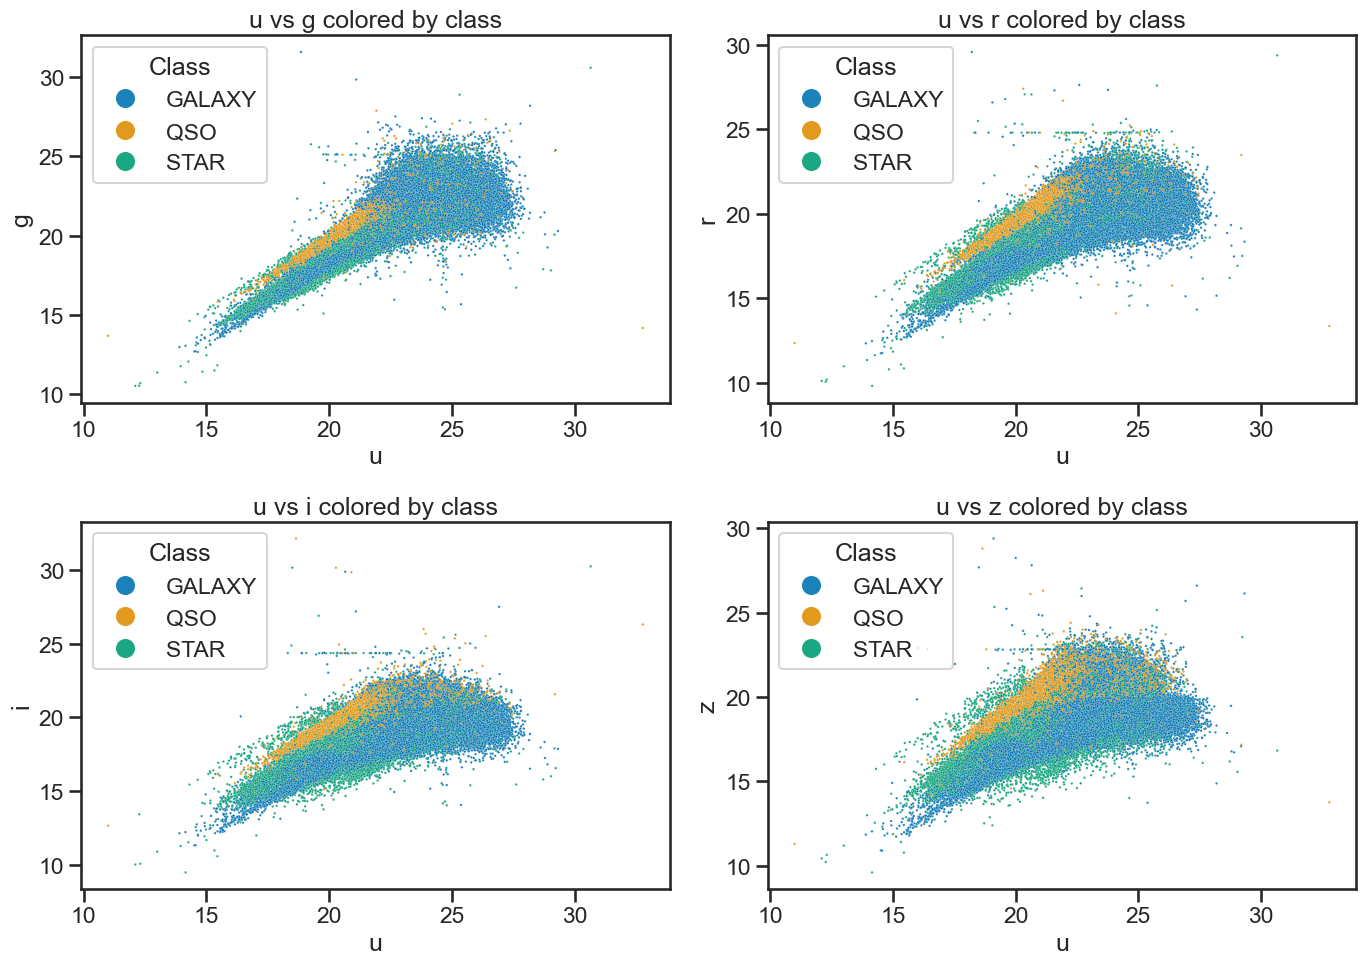

In [3]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# u vs g
sns.scatterplot(x='u', y='g', hue='class', data=df_stellar, ax=axes[0, 0], alpha=0.9, s=3)
axes[0, 0].set_xlabel('u')
axes[0, 0].set_ylabel('g')
axes[0, 0].set_title('u vs g colored by class')
axes[0, 0].legend(title='Class', loc='upper left', markerscale=8)

# u vs r
sns.scatterplot(x='u', y='r', hue='class', data=df_stellar, ax=axes[0, 1], alpha=0.9, s=3)
axes[0, 1].set_xlabel('u')
axes[0, 1].set_ylabel('r')
axes[0, 1].set_title('u vs r colored by class')
axes[0, 1].legend(title='Class', loc='upper left', markerscale=8)

# u vs i
sns.scatterplot(x='u', y='i', hue='class', data=df_stellar, ax=axes[1, 0], alpha=0.9, s=3)
axes[1, 0].set_xlabel('u')
axes[1, 0].set_ylabel('i')
axes[1, 0].set_title('u vs i colored by class')
axes[1, 0].legend(title='Class', loc='upper left', markerscale=8)

# u vs z
sns.scatterplot(x='u', y='z', hue='class', data=df_stellar, ax=axes[1, 1], alpha=0.9, s=3)
axes[1, 1].set_xlabel('u')
axes[1, 1].set_ylabel('z')
axes[1, 1].set_title('u vs z colored by class')
axes[1, 1].legend(title='Class', loc='upper left', markerscale=8)


plt.tight_layout()
plt.show()

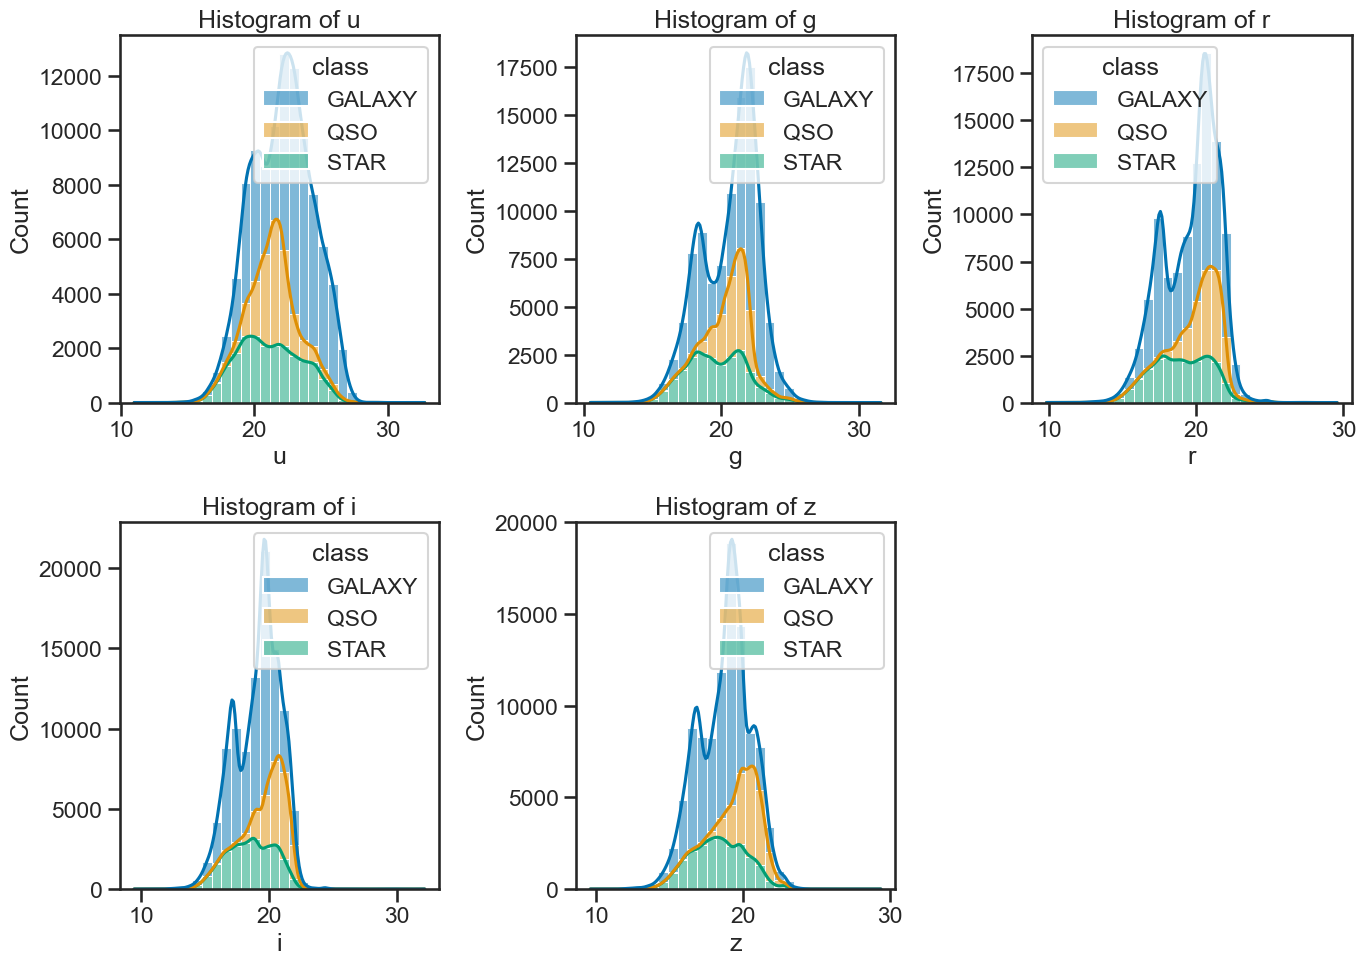

In [4]:
# create subplots
fig, axes = plt.subplots(2, 3, figsize=(14, 10))

# use seaborn to plot histograms of u, g, r, i, z
# include the class as hue
# and use kde for density estimation
sns.histplot(data=df_stellar, x='u', hue='class', multiple='stack', ax=axes[0, 0], bins=30, kde=True)
sns.histplot(data=df_stellar, x='g', hue='class', multiple='stack', ax=axes[0, 1], bins=30, kde=True)
sns.histplot(data=df_stellar, x='r', hue='class', multiple='stack', ax=axes[0, 2], bins=30, kde=True)
sns.histplot(data=df_stellar, x='i', hue='class', multiple='stack', ax=axes[1, 0], bins=30, kde=True)
sns.histplot(data=df_stellar, x='z', hue='class', multiple='stack', ax=axes[1, 1], bins=30, kde=True)

axes[1, 2].axis('off')  # Hide the empty subplot

# set titles for each subplot
axes[0, 0].set_title('Histogram of u')
axes[0, 1].set_title('Histogram of g')
axes[0, 2].set_title('Histogram of r')
axes[1, 0].set_title('Histogram of i')
axes[1, 1].set_title('Histogram of z')

plt.tight_layout()
plt.show()

/var/folders/qv/mnq6bff11kbfx3jwqvl1w12m0000gn/T/ipykernel_43427/2979916096.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([f"{cls}\n({percentages[cls]:.1f}%)" for cls in class_counts.index])


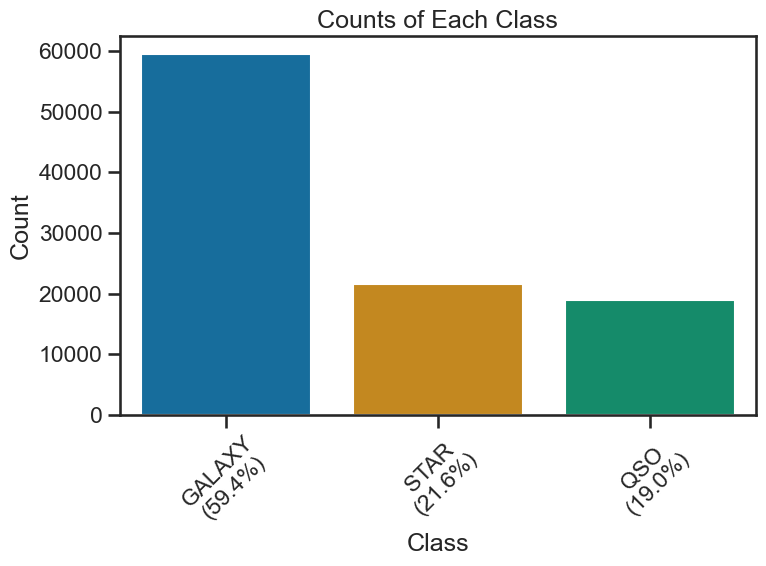

In [5]:
## Give the counts of each class
class_counts = df_stellar['class'].value_counts()

plt.figure(figsize=(8, 6))
ax = sns.barplot(x=class_counts.index, y=class_counts.values, hue=class_counts.index, palette='colorblind', legend=False)

# Calculate percentages for each class
percentages = df_stellar['class'].value_counts(normalize=True) * 100

# Set new x-axis labels with percentages under the class names
ax.set_xticklabels([f"{cls}\n({percentages[cls]:.1f}%)" for cls in class_counts.index])

plt.title('Counts of Each Class')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/var/folders/qv/mnq6bff11kbfx3jwqvl1w12m0000gn/T/ipykernel_43427/1616937457.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([f"{label}\n({percentages[label]:.1f}%)" for label in tick_labels])


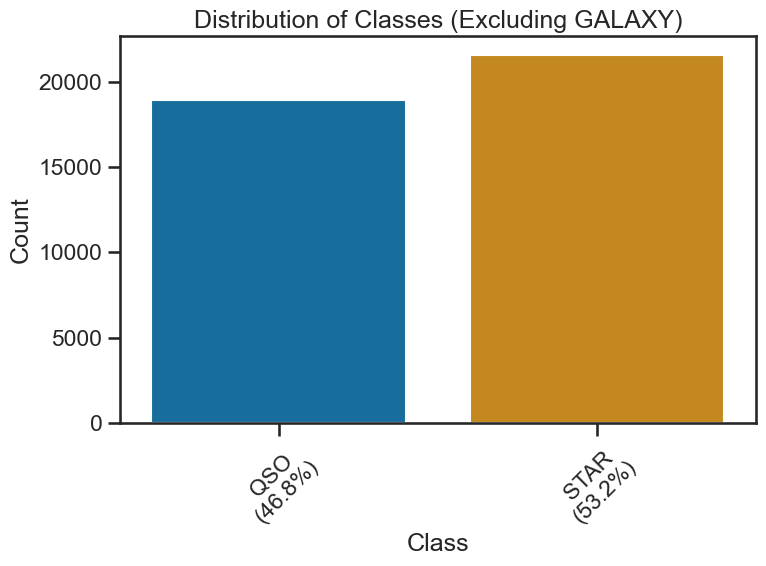

In [6]:
df_no_galaxies = df_stellar[df_stellar['class'] != 'GALAXY']

plt.figure(figsize=(8, 6))
ax = sns.countplot(x='class', data=df_no_galaxies, hue='class', palette='colorblind')

# Calculate percentages for each class
percentages = df_no_galaxies['class'].value_counts(normalize=True) * 100

# Get the current tick labels (class names in the order they appear)
tick_labels = [tick.get_text() for tick in ax.get_xticklabels()]

# Set new x-axis labels with percentages
ax.set_xticklabels([f"{label}\n({percentages[label]:.1f}%)" for label in tick_labels])

plt.title('Distribution of Classes (Excluding GALAXY)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Without Redshift

In [15]:
## Import necessary libraries for the classification model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define features  and target variable
X = df_no_galaxies[['u', 'g', 'r', 'i', 'z']]
y = df_no_galaxies['class']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(X_train_scaled, y_train)
# Evaluate the model
from sklearn.metrics import classification_report, confusion_matrix
# Make predictions on the test set
y_pred = knn_classifier.predict(X_test_scaled)
# Print the classification report
print(classification_report(y_test, y_pred))
# Print the confusion matrix

              precision    recall  f1-score   support

         QSO       0.86      0.86      0.86      3792
        STAR       0.88      0.88      0.88      4319

    accuracy                           0.87      8111
   macro avg       0.87      0.87      0.87      8111
weighted avg       0.87      0.87      0.87      8111



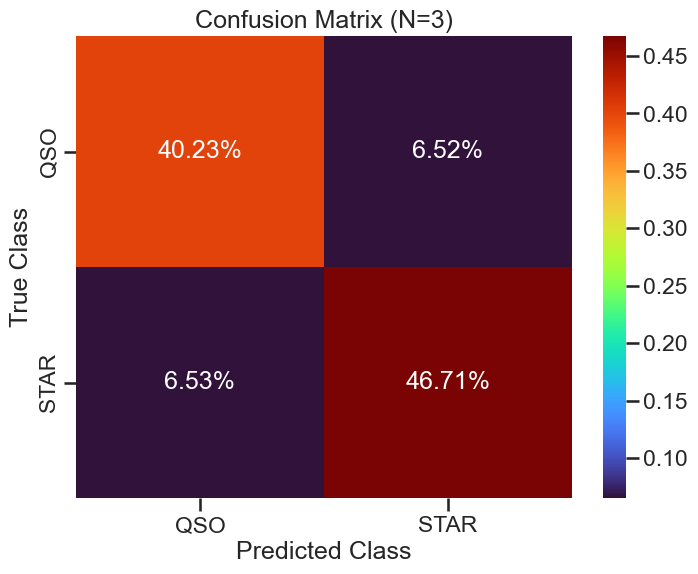

In [18]:
conf_matrix = confusion_matrix(y_test, y_pred)

def plot_confusion_matrix(conf_matrix, classes, N=0, filename=None):
    plt.figure(figsize=(8, 6))
    conf_matrix_prop = conf_matrix / conf_matrix.sum()
    sns.heatmap(conf_matrix_prop, annot=True, fmt='.2%', cmap='turbo',
                xticklabels=classes, yticklabels=classes)
    plt.title(f'Confusion Matrix (N={N})')
    plt.xlabel('Predicted Class')
    plt.ylabel('True Class')
    if filename:
        plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.show()

plot_confusion_matrix(conf_matrix, knn_classifier.classes_, 3, './figures/confusion_matrix_knn_n3.png')

In [19]:
# Show a plot of the u vs g scatter plot with the actual results, classification results, and misclassified points as three plots

def get_classification_dfs(X_test, y_test, y_pred):
    """
    Returns DataFrames for correctly and misclassified points.
    """
    df = X_test.copy()
    df['true_class'] = y_test
    df['predicted_class'] = y_pred
    misclassified = df[df['true_class'] != df['predicted_class']]
    return df, misclassified

def get_axis_limits(df, X_test):
    """
    Returns min and max for u and g columns for axis limits.
    """
    u_min = min(df['u'].min(), X_test['u'].min())
    u_max = max(df['u'].max(), X_test['u'].max())
    g_min = min(df['g'].min(), X_test['g'].min())
    g_max = max(df['g'].max(), X_test['g'].max())
    return u_min, u_max, g_min, g_max

# Prepare data for plotting
correctly_classified_df, misclassified_df = get_classification_dfs(X_test, y_test, y_pred)
u_min, u_max, g_min, g_max = get_axis_limits(df_no_galaxies, X_test)

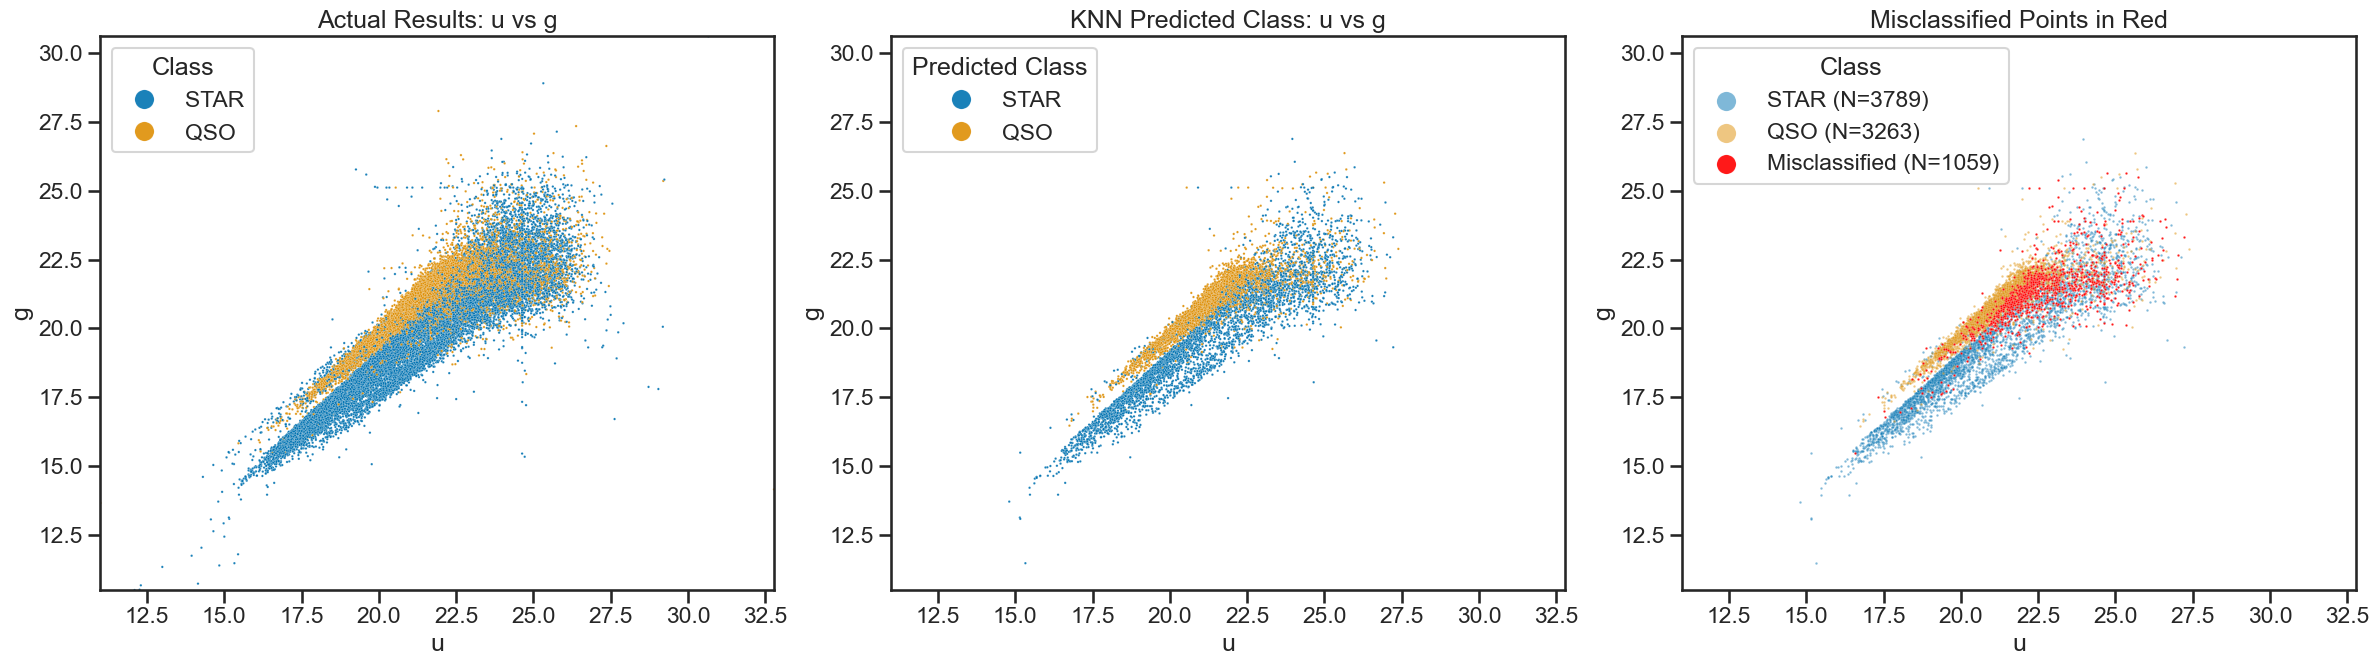

In [20]:
def plot_actual_results(ax, df, palette, class_order, u_min, u_max, g_min, g_max):
    sns.scatterplot(
        x='u', y='g', hue='class', data=df,
        alpha=0.9, s=3, palette=palette, ax=ax, hue_order=class_order
    )
    ax.set_title('Actual Results: u vs g')
    ax.set_xlabel('u')
    ax.set_ylabel('g')
    ax.legend(title='Class', loc='upper left', markerscale=8)
    ax.set_xlim(u_min, u_max)
    ax.set_ylim(g_min, g_max)

def plot_predicted_results(ax, X_test, y_pred, palette, class_order, u_min, u_max, g_min, g_max):
    sns.scatterplot(
        x=X_test['u'], y=X_test['g'], hue=y_pred,
        alpha=0.9, s=3, palette=palette, ax=ax, hue_order=class_order
    )
    ax.set_title('KNN Predicted Class: u vs g')
    ax.set_xlabel('u')
    ax.set_ylabel('g')
    ax.legend(title='Predicted Class', loc='upper left', markerscale=8)
    ax.set_xlim(u_min, u_max)
    ax.set_ylim(g_min, g_max)

def plot_misclassified(ax, correctly_classified_df, misclassified_df, palette, class_order, u_min, u_max, g_min, g_max):
    correct_counts = correctly_classified_df[correctly_classified_df['true_class'] == correctly_classified_df['predicted_class']]['predicted_class'].value_counts()
    for cls in class_order:
        cls_mask = (correctly_classified_df['predicted_class'] == cls) & (correctly_classified_df['true_class'] == cls)
        sns.scatterplot(
            x=correctly_classified_df.loc[cls_mask, 'u'],
            y=correctly_classified_df.loc[cls_mask, 'g'],
            color=palette[cls],
            label=f"{cls} (N={correct_counts.get(cls, 0)})",
            ax=ax, alpha=0.5, s=3
        )
    sns.scatterplot(
        x=misclassified_df['u'], y=misclassified_df['g'],
        color='red', label=f"Misclassified (N={len(misclassified_df)})", ax=ax, alpha=0.9, s=3
    )
    ax.set_title('Misclassified Points in Red')
    ax.set_xlabel('u')
    ax.set_ylabel('g')
    ax.legend(title='Class', loc='upper left', markerscale=8)
    ax.set_xlim(u_min, u_max)
    ax.set_ylim(g_min, g_max)

def plot_classification_results(df_no_galaxies, X_test, y_pred, correctly_classified_df, misclassified_df, u_min, u_max, g_min, g_max):
    fig, axs = plt.subplots(1, 3, figsize=(24, 7))
    class_order = ['STAR', 'QSO']
    palette = dict(zip(class_order, sns.color_palette('colorblind', n_colors=2)))
    plot_actual_results(axs[0], df_no_galaxies, palette, class_order, u_min, u_max, g_min, g_max)
    plot_predicted_results(axs[1], X_test, y_pred, palette, class_order, u_min, u_max, g_min, g_max)
    plot_misclassified(axs[2], correctly_classified_df, misclassified_df, palette, class_order, u_min, u_max, g_min, g_max)
    plt.tight_layout()
    plt.savefig('./figures/classification_results_knn_n3.png', dpi=300, bbox_inches='tight')
    plt.show()

# Call the modular plotting function
plot_classification_results(df_no_galaxies, X_test, y_pred, correctly_classified_df, misclassified_df, u_min, u_max, g_min, g_max)

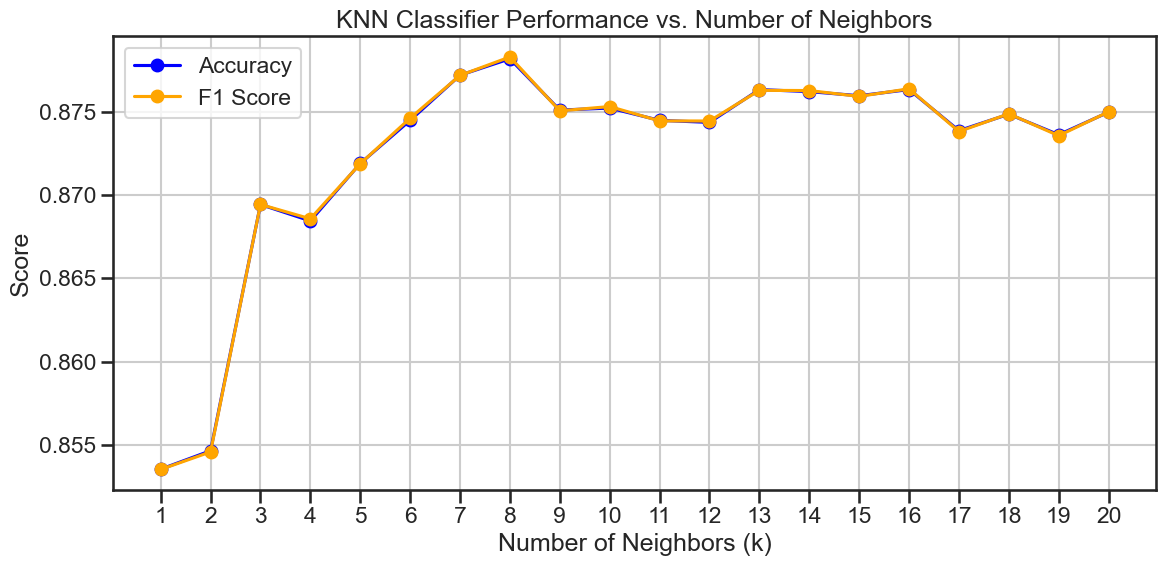

In [11]:
def knn_performance_vs_neighbors(X_train_scaled, y_train, X_test_scaled, y_test, k_range=range(1, 21)):
    from sklearn.metrics import accuracy_score, f1_score
    accuracies = []
    f1_scores = []
    for k in k_range:
        knn_classifier = KNeighborsClassifier(n_neighbors=k)
        knn_classifier.fit(X_train_scaled, y_train)
        y_pred = knn_classifier.predict(X_test_scaled)
        accuracies.append(accuracy_score(y_test, y_pred))
        f1_scores.append(f1_score(y_test, y_pred, average='weighted'))
    return list(k_range), accuracies, f1_scores

def plot_knn_performance(neighbors, accuracies, f1_scores, filename=None):
    plt.figure(figsize=(12, 6))
    plt.plot(neighbors, accuracies, marker='o', label='Accuracy', color='blue')
    plt.plot(neighbors, f1_scores, marker='o', label='F1 Score', color='orange')
    plt.title('KNN Classifier Performance vs. Number of Neighbors')
    plt.xlabel('Number of Neighbors (k)')
    plt.ylabel('Score')
    plt.xticks(neighbors)
    plt.legend()
    plt.grid()
    plt.tight_layout()
    if filename:
        plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.show()

neighbors, accuracies, f1_scores = knn_performance_vs_neighbors(X_train_scaled, y_train, X_test_scaled, y_test)
plot_knn_performance(neighbors, accuracies, f1_scores, './figures/knn_performance_vs_neighbors.png')


              precision    recall  f1-score   support

         QSO       0.87      0.86      0.87      3792
        STAR       0.88      0.89      0.88      4319

    accuracy                           0.88      8111
   macro avg       0.87      0.87      0.87      8111
weighted avg       0.88      0.88      0.88      8111



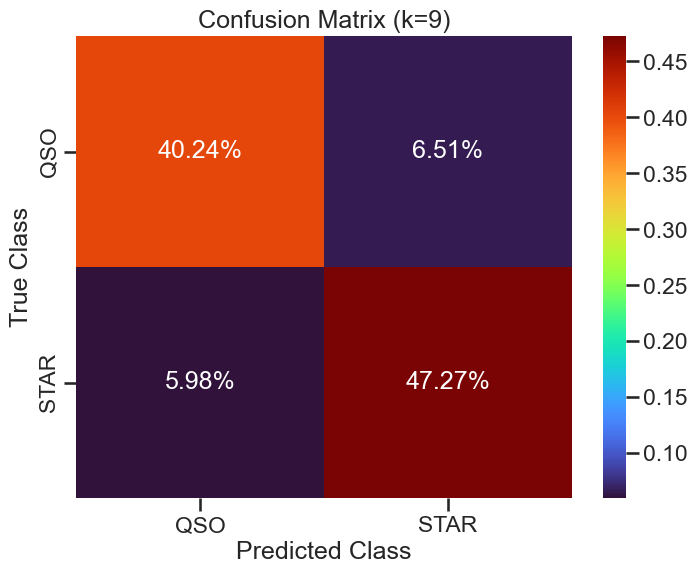

In [33]:
# Create and train the KNN classifier with k=9
knn_classifier = KNeighborsClassifier(n_neighbors=9)
knn_classifier.fit(X_train_scaled, y_train)
# Make predictions on the test set
y_pred = knn_classifier.predict(X_test_scaled)
# Print the classification report
print(classification_report(y_test, y_pred))
# Print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
# Calculate proportions
conf_matrix_prop = conf_matrix / conf_matrix.sum()
sns.heatmap(conf_matrix_prop, annot=True, fmt='.2%', cmap='turbo',
            xticklabels=knn_classifier.classes_, yticklabels=knn_classifier.classes_)
plt.title('Confusion Matrix (k=9)')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')

# write the figure to a file
plt.savefig('./figures/confusion_matrix_knn_n9.png', dpi=300, bbox_inches='tight')

plt.show()

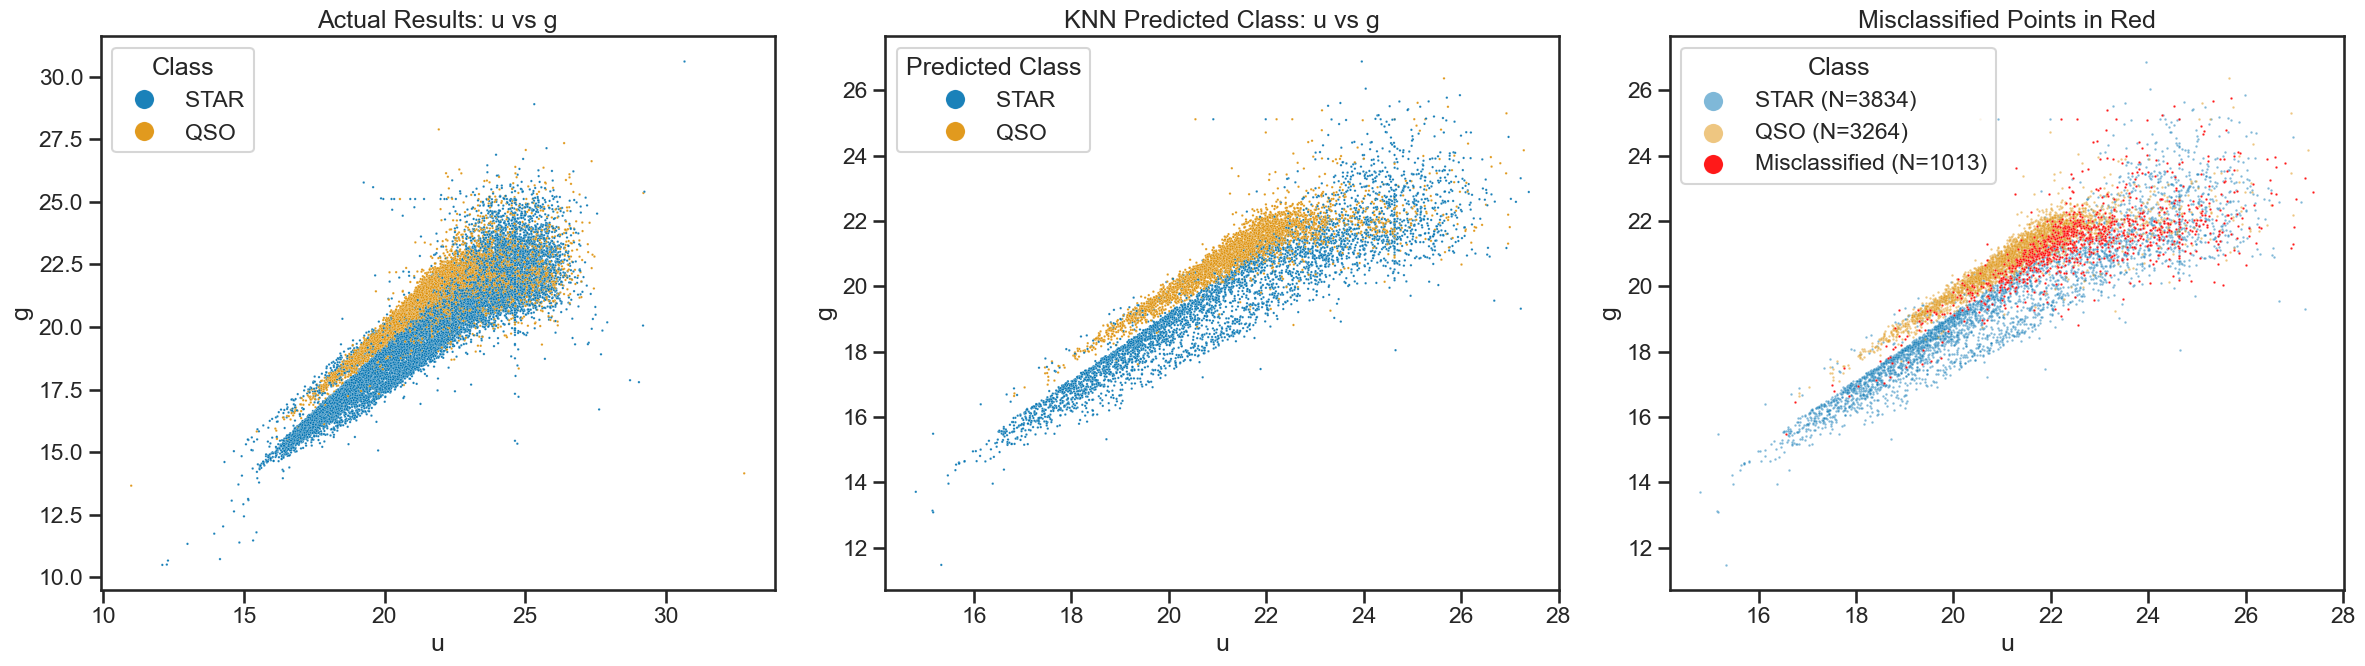

In [37]:
# Show a plot of the u vs g scatter plot with the actual results, classification results, and misclassified points as three plots

correctly_classified_df = X_test.copy()
correctly_classified_df['true_class'] = y_test
correctly_classified_df['predicted_class'] = y_pred
misclassified_df = correctly_classified_df[correctly_classified_df['true_class'] != correctly_classified_df['predicted_class']]

u_min = min(df_no_galaxies['u'].min(), X_test['u'].min())
u_max = max(df_no_galaxies['u'].max(), X_test['u'].max())
g_min = min(df_no_galaxies['g'].min(), X_test['g'].min())
g_max = max(df_no_galaxies['g'].max(), X_test['g'].max())


fig, axs = plt.subplots(1, 3, figsize=(24, 7))

# To ensure STAR and QSO have the same color in all plots, define a consistent palette mapping
class_order = ['STAR', 'QSO']
palette = dict(zip(class_order, sns.color_palette('colorblind', n_colors=2)))

# 1. Plot the actual results (u vs g, colored by true class)
sns.scatterplot(
    x='u', y='g', hue='class', data=df_no_galaxies,
    alpha=0.9, s=3, palette=palette, ax=axs[0], hue_order=class_order
)
axs[0].set_title('Actual Results: u vs g')
axs[0].set_xlabel('u')
axs[0].set_ylabel('g')
axs[0].legend(title='Class', loc='upper left', markerscale=8)

# 2. Plot the classification results (u vs g, colored by predicted class)
sns.scatterplot(
    x=X_test['u'], y=X_test['g'], hue=y_pred,
    alpha=0.9, s=3, palette=palette, ax=axs[1], hue_order=class_order
)
axs[1].set_title('KNN Predicted Class: u vs g')
axs[1].set_xlabel('u')
axs[1].set_ylabel('g')
axs[1].legend(title='Predicted Class', loc='upper left', markerscale=8)

# 3. Plot only the misclassified points in red, correctly classified in class colors
# Count the number of correctly classified points for each predicted class
correct_counts = correctly_classified_df[correctly_classified_df['true_class'] == correctly_classified_df['predicted_class']]['predicted_class'].value_counts()

# Plot correctly classified points, with legend showing N for each class
for cls in class_order:
    cls_mask = (correctly_classified_df['predicted_class'] == cls) & (correctly_classified_df['true_class'] == cls)
    sns.scatterplot(
        x=correctly_classified_df.loc[cls_mask, 'u'],
        y=correctly_classified_df.loc[cls_mask, 'g'],
        color=palette[cls],
        label=f"{cls} (N={correct_counts.get(cls, 0)})",
        ax=axs[2], alpha=0.5, s=3
    )

# Plot misclassified points in red
sns.scatterplot(
    x=misclassified_df['u'], y=misclassified_df['g'],
    color='red', label=f"Misclassified (N={len(misclassified_df)})", ax=axs[2], alpha=0.9, s=3
)
axs[2].set_title('Misclassified Points in Red')
axs[2].set_xlabel('u')
axs[2].set_ylabel('g')
axs[2].legend(title='Class', loc='upper left', markerscale=8)

plt.tight_layout()

# write the figure to a file
plt.savefig('./figures/classification_results_knn_n9.png', dpi=300, bbox_inches='tight')

plt.show()

## Adding redshift

              precision    recall  f1-score   support

         QSO       1.00      0.99      0.99      3792
        STAR       0.99      1.00      0.99      4319

    accuracy                           0.99      8111
   macro avg       0.99      0.99      0.99      8111
weighted avg       0.99      0.99      0.99      8111



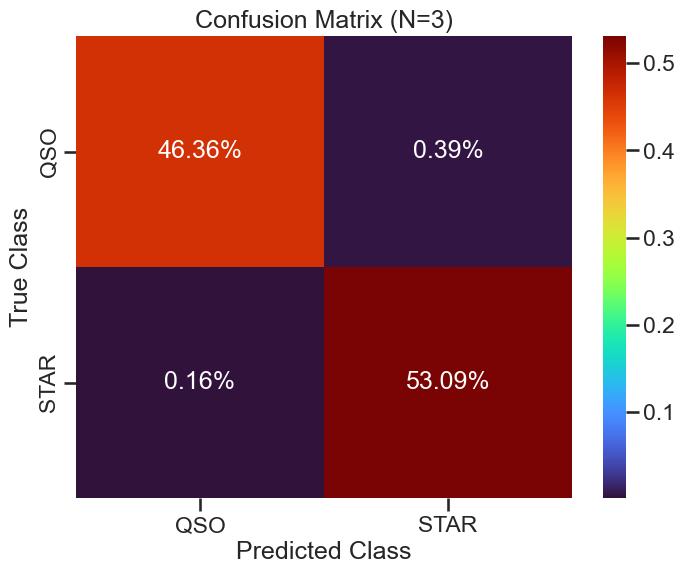

In [62]:
## Import necessary libraries for the classification model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define features and target variable
X = df_no_galaxies[['u', 'g', 'r', 'i', 'z','redshift']]
y = df_no_galaxies['class']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(X_train_scaled, y_train)

# Evaluate the model
from sklearn.metrics import classification_report, confusion_matrix
# Make predictions on the test set
y_pred = knn_classifier.predict(X_test_scaled)
# Print the classification report
print(classification_report(y_test, y_pred))
# Print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
# Calculate proportions
conf_matrix_prop = conf_matrix / conf_matrix.sum()
sns.heatmap(conf_matrix_prop, annot=True, fmt='.2%', cmap='turbo',
            xticklabels=knn_classifier.classes_, yticklabels=knn_classifier.classes_)
plt.title('Confusion Matrix (N=3)')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')

# write the figure to a file
plt.savefig('./figures/confusion_matrix_knn_n3_w_redshift.png', dpi=300, bbox_inches='tight')

plt.show()

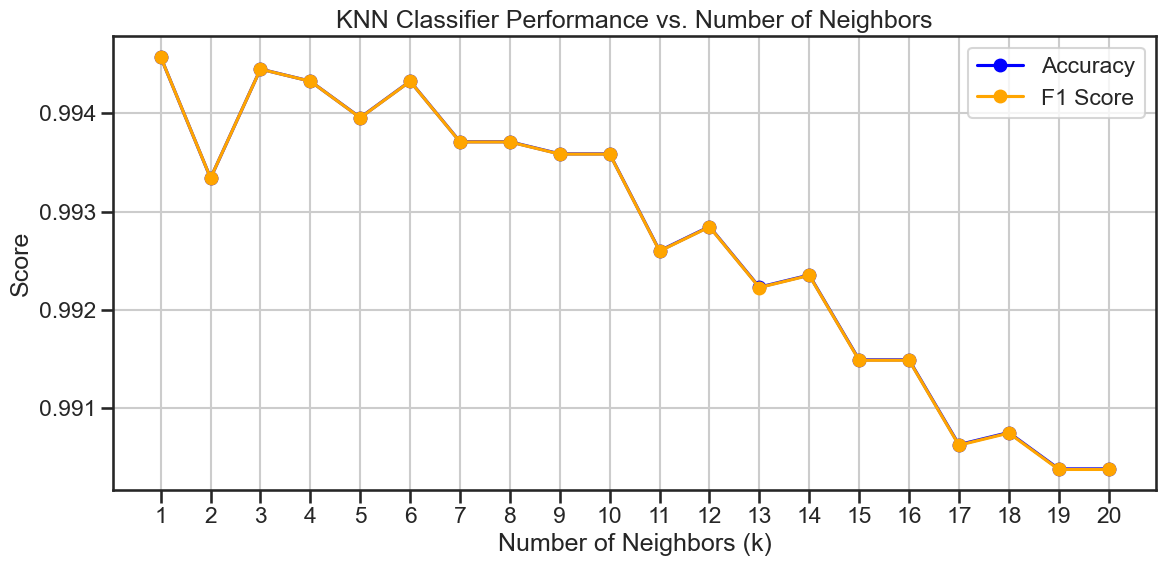

In [63]:
# Let's try varying the number of neighbors and plotting the accuracy and F1 score
from sklearn.metrics import accuracy_score, f1_score
# Initialize lists to store results
neighbors = list(range(1, 21))
accuracies = []
f1_scores = []
# Loop through different values of k
for k in neighbors:
    # Create and train the KNN classifier
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(X_train_scaled, y_train)
    
    # Make predictions on the test set
    y_pred = knn_classifier.predict(X_test_scaled)
    
    # Calculate accuracy and F1 score
    accuracies.append(accuracy_score(y_test, y_pred))
    f1_scores.append(f1_score(y_test, y_pred, average='weighted'))

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(neighbors, accuracies, marker='o', label='Accuracy', color='blue')
plt.plot(neighbors, f1_scores, marker='o', label='F1 Score', color='orange')
plt.title('KNN Classifier Performance vs. Number of Neighbors')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Score')
plt.xticks(neighbors)
plt.legend()
plt.grid()
plt.tight_layout()

# write the figure to a file
plt.savefig('./figures/knn_performance_vs_neighbors.png', dpi=300, bbox_inches='tight')

plt.show()

              precision    recall  f1-score   support

         QSO       1.00      0.98      0.99      3792
        STAR       0.99      1.00      0.99      4319

    accuracy                           0.99      8111
   macro avg       0.99      0.99      0.99      8111
weighted avg       0.99      0.99      0.99      8111



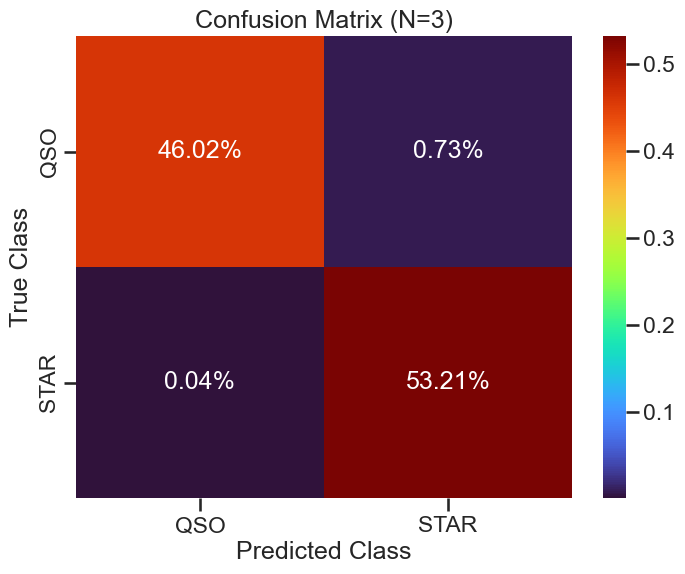

In [64]:
## Import necessary libraries for the classification model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define features and target variable
X = df_no_galaxies[['u', 'g', 'r', 'i', 'z','redshift']]
y = df_no_galaxies['class']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=14)
knn_classifier.fit(X_train_scaled, y_train)

# Evaluate the model
from sklearn.metrics import classification_report, confusion_matrix
# Make predictions on the test set
y_pred = knn_classifier.predict(X_test_scaled)
# Print the classification report
print(classification_report(y_test, y_pred))
# Print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
# Calculate proportions
conf_matrix_prop = conf_matrix / conf_matrix.sum()
sns.heatmap(conf_matrix_prop, annot=True, fmt='.2%', cmap='turbo',
            xticklabels=knn_classifier.classes_, yticklabels=knn_classifier.classes_)
plt.title('Confusion Matrix (N=3)')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')

# write the figure to a file
plt.savefig('./figures/confusion_matrix_knn_n3_w_redshift.png', dpi=300, bbox_inches='tight')

plt.show()

## Using PCA to reduce dimensionality

/Users/caballero/repos/teaching/MSU_REU_ML_course/.venv/lib/python3.13/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: divide by zero encountered in matmul
  X_transformed = X @ self.components_.T
/Users/caballero/repos/teaching/MSU_REU_ML_course/.venv/lib/python3.13/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: overflow encountered in matmul
  X_transformed = X @ self.components_.T
/Users/caballero/repos/teaching/MSU_REU_ML_course/.venv/lib/python3.13/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: invalid value encountered in matmul
  X_transformed = X @ self.components_.T


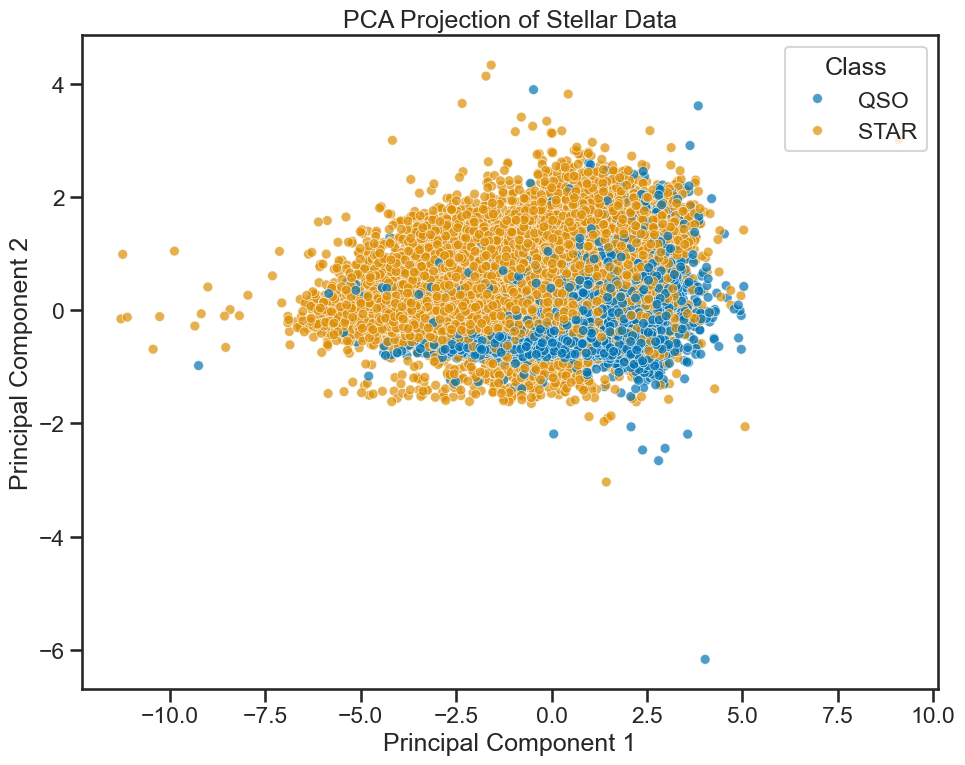

In [47]:
## Show a projection of the data in 2D and color by class
from sklearn.decomposition import PCA
# Perform PCA to reduce the data to 4D
pca = PCA(n_components=4) 
X_pca = pca.fit_transform(X_train_scaled)
# Create a DataFrame for the PCA results
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2','PC3','PC4'])
# Add the target variable to the PCA DataFrame
pca_df['class'] = y_train.values
# Plot the PCA results
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='class', data=pca_df, alpha=0.7, s=50, palette='colorblind')
plt.title('PCA Projection of Stellar Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Class', loc='upper right')
plt.tight_layout()
plt.show()

              precision    recall  f1-score   support

         QSO       0.87      0.86      0.87      3034
        STAR       0.88      0.89      0.88      3455

    accuracy                           0.88      6489
   macro avg       0.88      0.87      0.87      6489
weighted avg       0.88      0.88      0.88      6489



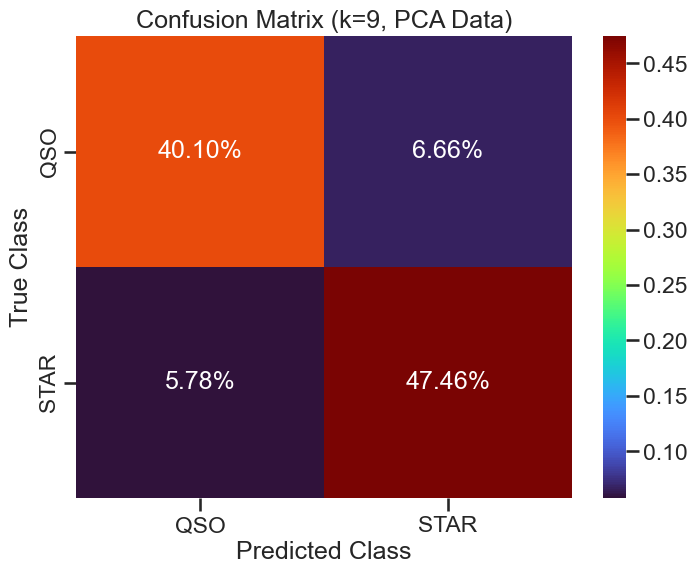

In [48]:
# Use the PCA components to train a new KNN classifier
X_train_pca = pca_df[['PC1', 'PC2', 'PC3', 'PC4']]
# Split the PCA data into training and testing sets
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_train_pca, y_train, test_size=0.2, random_state=42, stratify=y_train)
# Create and train the KNN classifier on PCA data
knn_classifier_pca = KNeighborsClassifier(n_neighbors=9)
knn_classifier_pca.fit(X_train_pca, y_train_pca)
# Make predictions on the PCA test set
y_pred_pca = knn_classifier_pca.predict(X_test_pca)
# Print the classification report for PCA data
print(classification_report(y_test_pca, y_pred_pca))
# Print the confusion matrix for PCA data
conf_matrix_pca = confusion_matrix(y_test_pca, y_pred_pca)
plt.figure(figsize=(8, 6))
# Calculate proportions
conf_matrix_prop_pca = conf_matrix_pca / conf_matrix_pca.sum()
sns.heatmap(conf_matrix_prop_pca, annot=True, fmt='.2%', cmap='turbo',
            xticklabels=knn_classifier_pca.classes_, yticklabels=knn_classifier_pca.classes_)
plt.title('Confusion Matrix (k=9, PCA Data)')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')

# write the figure to a file
plt.savefig('./figures/confusion_matrix_knn_n9_pca.png', dpi=300, bbox_inches='tight')

plt.show()

In [54]:
# Perform cross-validation on the KNN classifier with k=9
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(knn_classifier, X_train, y_train, cv=5, scoring='accuracy')
cv_f1_scores = cross_val_score(knn_classifier, X_train, y_train, cv=5, scoring='f1_weighted')

print("Cross-validation scores (accuracy):", cv_scores)
print("Mean accuracy:", cv_scores.mean())
print("Standard deviation of accuracy:", cv_scores.std())

print("Cross-validation F1 scores:", cv_f1_scores)
print("Mean F1 score:", cv_f1_scores.mean())
print("Standard deviation of F1 score:", cv_f1_scores.std())

Cross-validation scores (accuracy): [0.87332409 0.87517337 0.87501926 0.87469174 0.87823674]
Mean accuracy: 0.8752890407915969
Standard deviation of accuracy: 0.0016120131417357829
Cross-validation F1 scores: [0.87328026 0.87505384 0.87490132 0.87477058 0.87826448]
Mean F1 score: 0.8752540969918124
Standard deviation of F1 score: 0.0016344274152105072


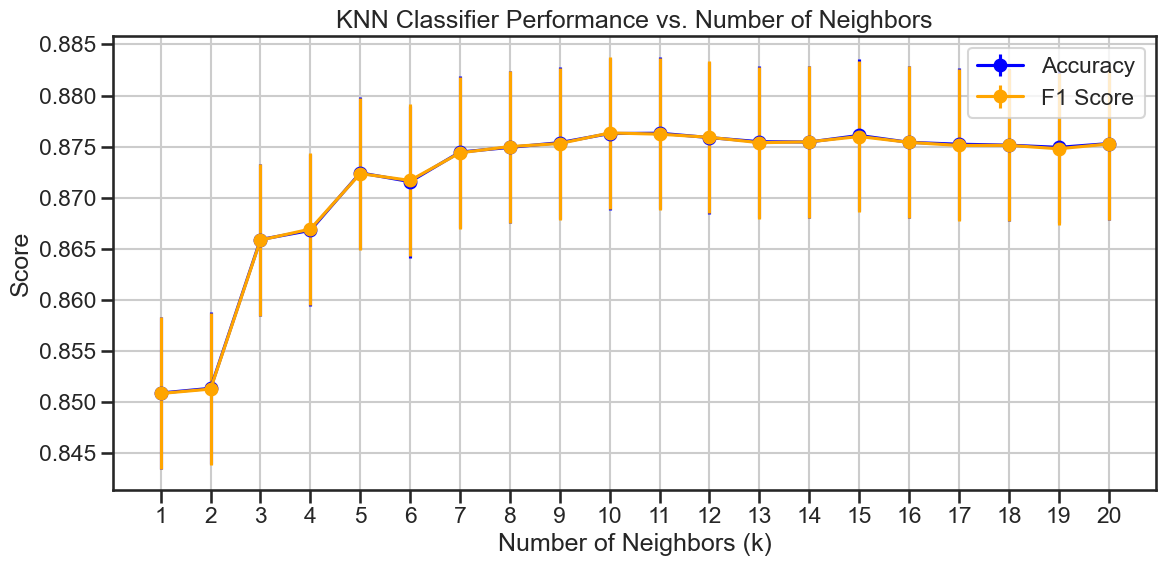

In [56]:
# ok, now do the same thing for k=1 to 20 and plot the results with error bars

cv_accuracies = []
cv_f1_scores = []
# Loop through different values of k
for k in range(1, 21):
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    # Perform cross-validation
    cv_accuracy = cross_val_score(knn_classifier, X_train, y_train, cv=5, scoring='accuracy')
    cv_f1 = cross_val_score(knn_classifier, X_train, y_train, cv=5, scoring='f1_weighted')
    
    cv_accuracies.append(cv_accuracy.mean())
    cv_f1_scores.append(cv_f1.mean())

# Plot the results with error bars
plt.figure(figsize=(12, 6))
plt.errorbar(range(1, 21), cv_accuracies, yerr=np.std(cv_accuracies), label='Accuracy', marker='o', color='blue')
plt.errorbar(range(1, 21), cv_f1_scores, yerr=np.std(cv_f1_scores), label='F1 Score', marker='o', color='orange')
plt.title('KNN Classifier Performance vs. Number of Neighbors')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Score')
plt.xticks(range(1, 21))
plt.legend()
plt.grid()
plt.tight_layout()
# write the figure to a file
plt.savefig('./figures/knn_performance_vs_neighbors_crossval.png', dpi=300, bbox_inches='tight')
plt.show()

              precision    recall  f1-score   support

         QSO       0.85      0.88      0.86      3792
        STAR       0.89      0.86      0.88      4319

    accuracy                           0.87      8111
   macro avg       0.87      0.87      0.87      8111
weighted avg       0.87      0.87      0.87      8111



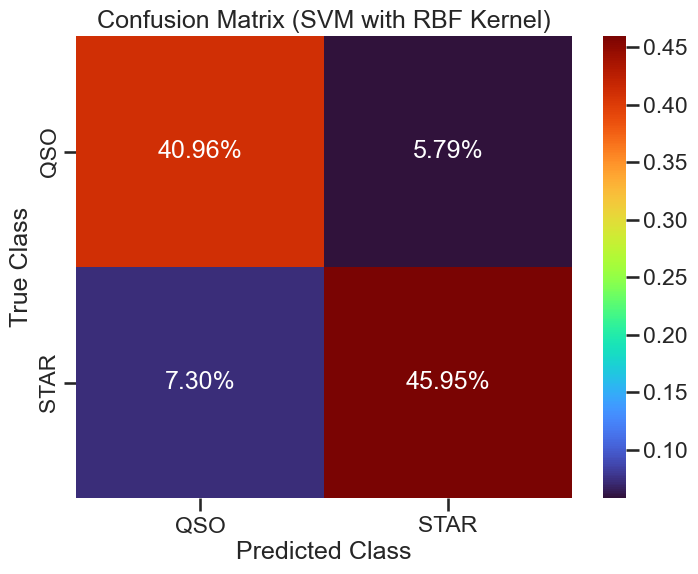

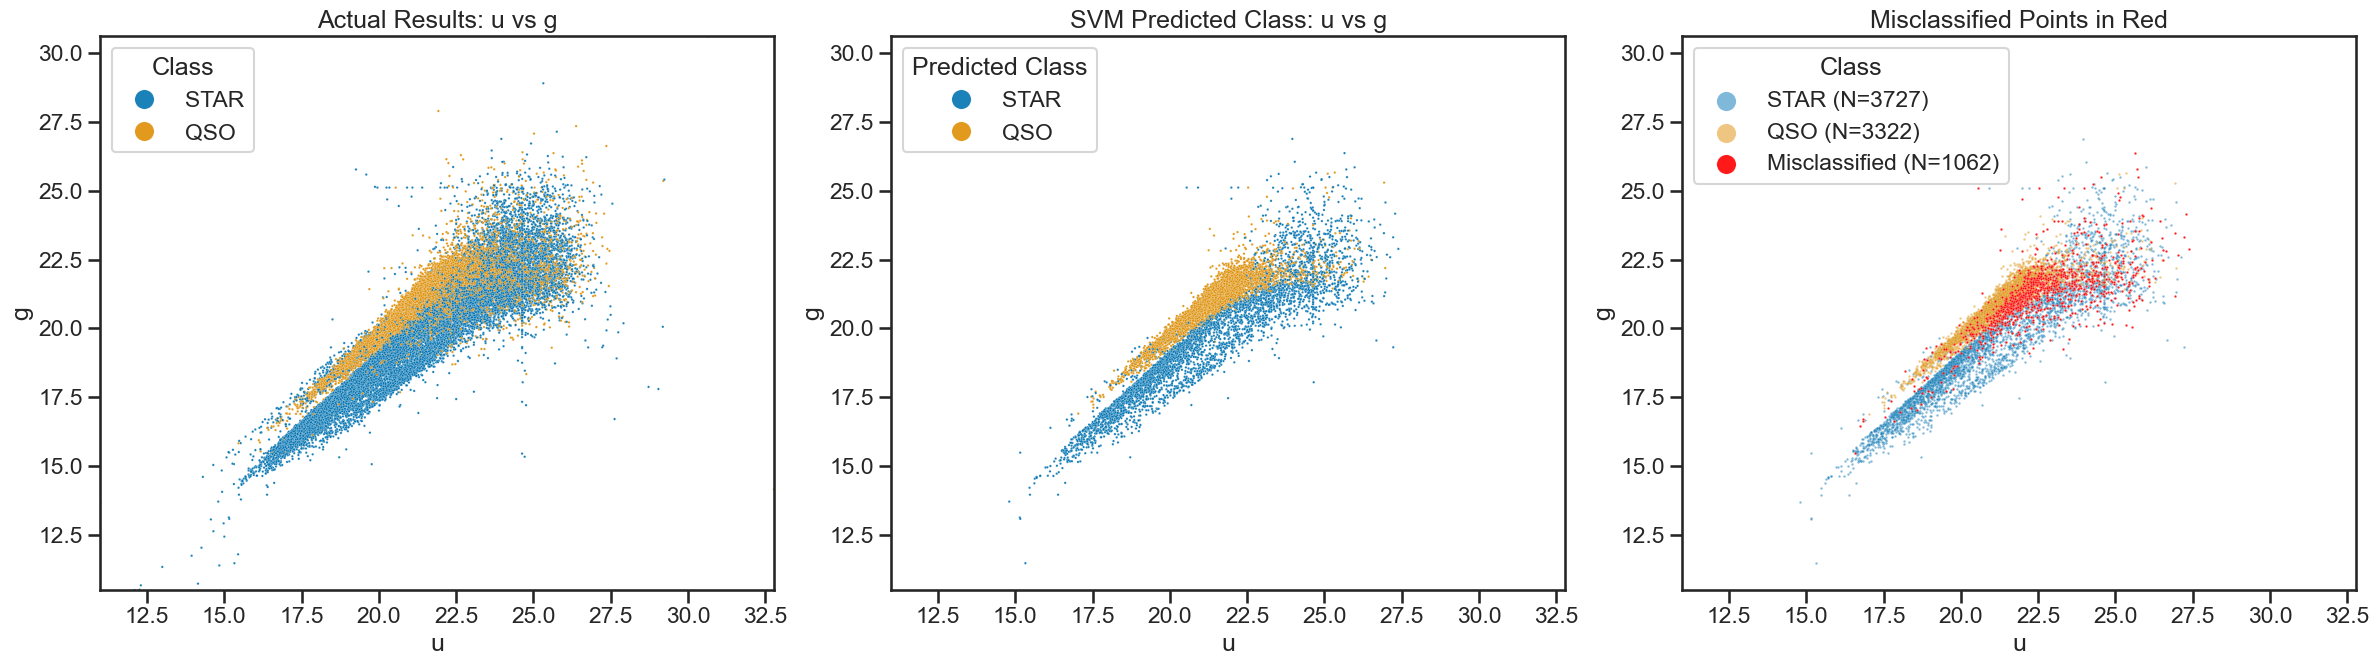

In [58]:
# great, let's try using a SVM with a radial basis function kernel
# let do that on the regular data only

from sklearn.svm import SVC
# Create and train the SVM classifier with RBF kernel
svm_classifier = SVC(kernel='rbf', gamma='scale', C=1.0, random_state=42)
svm_classifier.fit(X_train_scaled, y_train)
# Make predictions on the test set
y_pred_svm = svm_classifier.predict(X_test_scaled)
# Print the classification report for SVM
print(classification_report(y_test, y_pred_svm))
# Print the confusion matrix for SVM
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(8, 6))
# Calculate proportions
conf_matrix_prop_svm = conf_matrix_svm / conf_matrix_svm.sum()
sns.heatmap(conf_matrix_prop_svm, annot=True, fmt='.2%', cmap='turbo',
            xticklabels=svm_classifier.classes_, yticklabels=svm_classifier.classes_)
plt.title('Confusion Matrix (SVM with RBF Kernel)')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
# write the figure to a file
plt.savefig('./figures/confusion_matrix_svm_rbf.png', dpi=300, bbox_inches='tight')
plt.show()

# Show a plot of the u vs g scatter plot with the actual results, classification results, and misclassified points as three plots
correctly_classified_df = X_test.copy()
correctly_classified_df['true_class'] = y_test
correctly_classified_df['predicted_class'] = y_pred_svm
misclassified_df = correctly_classified_df[correctly_classified_df['true_class'] != correctly_classified_df['predicted_class']]
u_min = min(df_no_galaxies['u'].min(), X_test['u'].min())
u_max = max(df_no_galaxies['u'].max(), X_test['u'].max())
g_min = min(df_no_galaxies['g'].min(), X_test['g'].min())
g_max = max(df_no_galaxies['g'].max(), X_test['g'].max())
fig, axs = plt.subplots(1, 3, figsize=(24, 7))
# To ensure STAR and QSO have the same color in all plots, define a consistent palette mapping
class_order = ['STAR', 'QSO']
palette = dict(zip(class_order, sns.color_palette('colorblind', n_colors=2)))
# 1. Plot the actual results (u vs g, colored by true class)
sns.scatterplot(
    x='u', y='g', hue='class', data=df_no_galaxies,
    alpha=0.9, s=3, palette=palette, ax=axs[0], hue_order=class_order
)
axs[0].set_title('Actual Results: u vs g')
axs[0].set_xlabel('u')
axs[0].set_ylabel('g')
axs[0].legend(title='Class', loc='upper left', markerscale=8)
# 2. Plot the classification results (u vs g, colored by predicted class)
sns.scatterplot(
    x=X_test['u'], y=X_test['g'], hue=y_pred_svm,
    alpha=0.9, s=3, palette=palette, ax=axs[1], hue_order=class_order
)
axs[1].set_title('SVM Predicted Class: u vs g')
axs[1].set_xlabel('u')
axs[1].set_ylabel('g')
axs[1].legend(title='Predicted Class', loc='upper left', markerscale=8)
# 3. Plot only the misclassified points in red, correctly classified in class colors
# Count the number of correctly classified points for each predicted class
correct_counts = correctly_classified_df[correctly_classified_df['true_class'] == correctly_classified_df['predicted_class']]['predicted_class'].value_counts()
# Plot correctly classified points, with legend showing N for each class
for cls in class_order:
    cls_mask = (correctly_classified_df['predicted_class'] == cls) & (correctly_classified_df['true_class'] == cls)
    sns.scatterplot(
        x=correctly_classified_df.loc[cls_mask, 'u'],
        y=correctly_classified_df.loc[cls_mask, 'g'],
        color=palette[cls],
        label=f"{cls} (N={correct_counts.get(cls, 0)})",
        ax=axs[2], alpha=0.5, s=3
    )
# Plot misclassified points in red

sns.scatterplot(
    x=misclassified_df['u'], y=misclassified_df['g'],
    color='red', label=f"Misclassified (N={len(misclassified_df)})", ax=axs[2], alpha=0.9, s=3
)
axs[2].set_title('Misclassified Points in Red')
axs[2].set_xlabel('u')
axs[2].set_ylabel('g')
axs[2].legend(title='Class', loc='upper left', markerscale=8)
# Set the same axes limits for all plots
for ax in axs:
    ax.set_xlim(u_min, u_max)
    ax.set_ylim(g_min, g_max)
plt.tight_layout()

# write the figure to a file
plt.savefig('./figures/classification_results_svm_rbf.png', dpi=300, bbox_inches='tight')
plt.show()


              precision    recall  f1-score   support

      GALAXY       0.90      0.94      0.92     11889
         QSO       0.81      0.78      0.79      3792
        STAR       0.80      0.73      0.76      4319

    accuracy                           0.86     20000
   macro avg       0.83      0.82      0.82     20000
weighted avg       0.86      0.86      0.86     20000



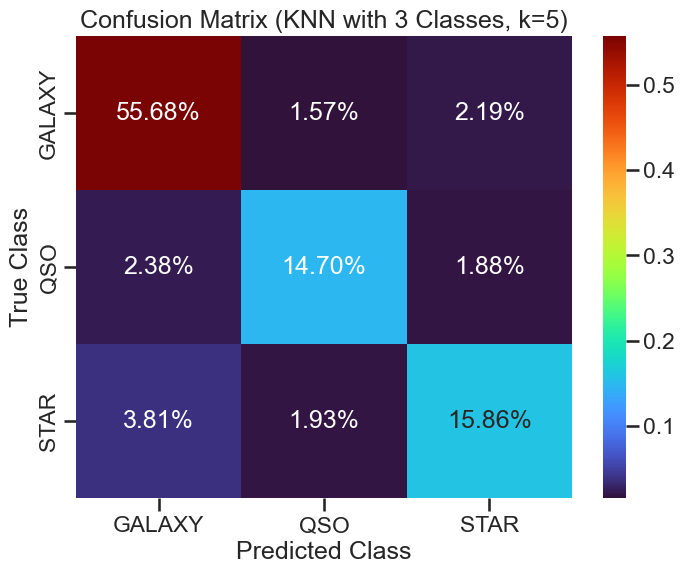

In [59]:
## Ok let's go back to the 3 class problem and try KNN with it; let's just use k=5 for now because that worked for the 2 class problem

# build x and y for the 3 class problem
X_3class = df_stellar[['u', 'g', 'r', 'i', 'z']]
y_3class = df_stellar['class']
# Split the dataset into training and testing sets
X_train_3class, X_test_3class, y_train_3class, y_test_3class = train_test_split(X_3class, y_3class, test_size=0.2, random_state=42, stratify=y_3class)

# Standardize the features
scaler_3class = StandardScaler()
X_train_3class_scaled = scaler_3class.fit_transform(X_train_3class)
X_test_3class_scaled = scaler_3class.transform(X_test_3class)

# Create and train the KNN classifier
knn_classifier_3class = KNeighborsClassifier(n_neighbors=5)
knn_classifier_3class.fit(X_train_3class_scaled, y_train_3class)

# Make predictions on the test set
y_pred_3class = knn_classifier_3class.predict(X_test_3class_scaled)

# Print the classification report
print(classification_report(y_test_3class, y_pred_3class))

# Print the confusion matrix
conf_matrix_3class = confusion_matrix(y_test_3class, y_pred_3class)
plt.figure(figsize=(8, 6))
# Calculate proportions
conf_matrix_prop_3class = conf_matrix_3class / conf_matrix_3class.sum()
sns.heatmap(conf_matrix_prop_3class, annot=True, fmt='.2%', cmap='turbo',
            xticklabels=knn_classifier_3class.classes_, yticklabels=knn_classifier_3class.classes_)
plt.title('Confusion Matrix (KNN with 3 Classes, k=5)')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
# write the figure to a file
plt.savefig('./figures/confusion_matrix_knn_3class_n5.png', dpi=300, bbox_inches='tight')
plt.show()

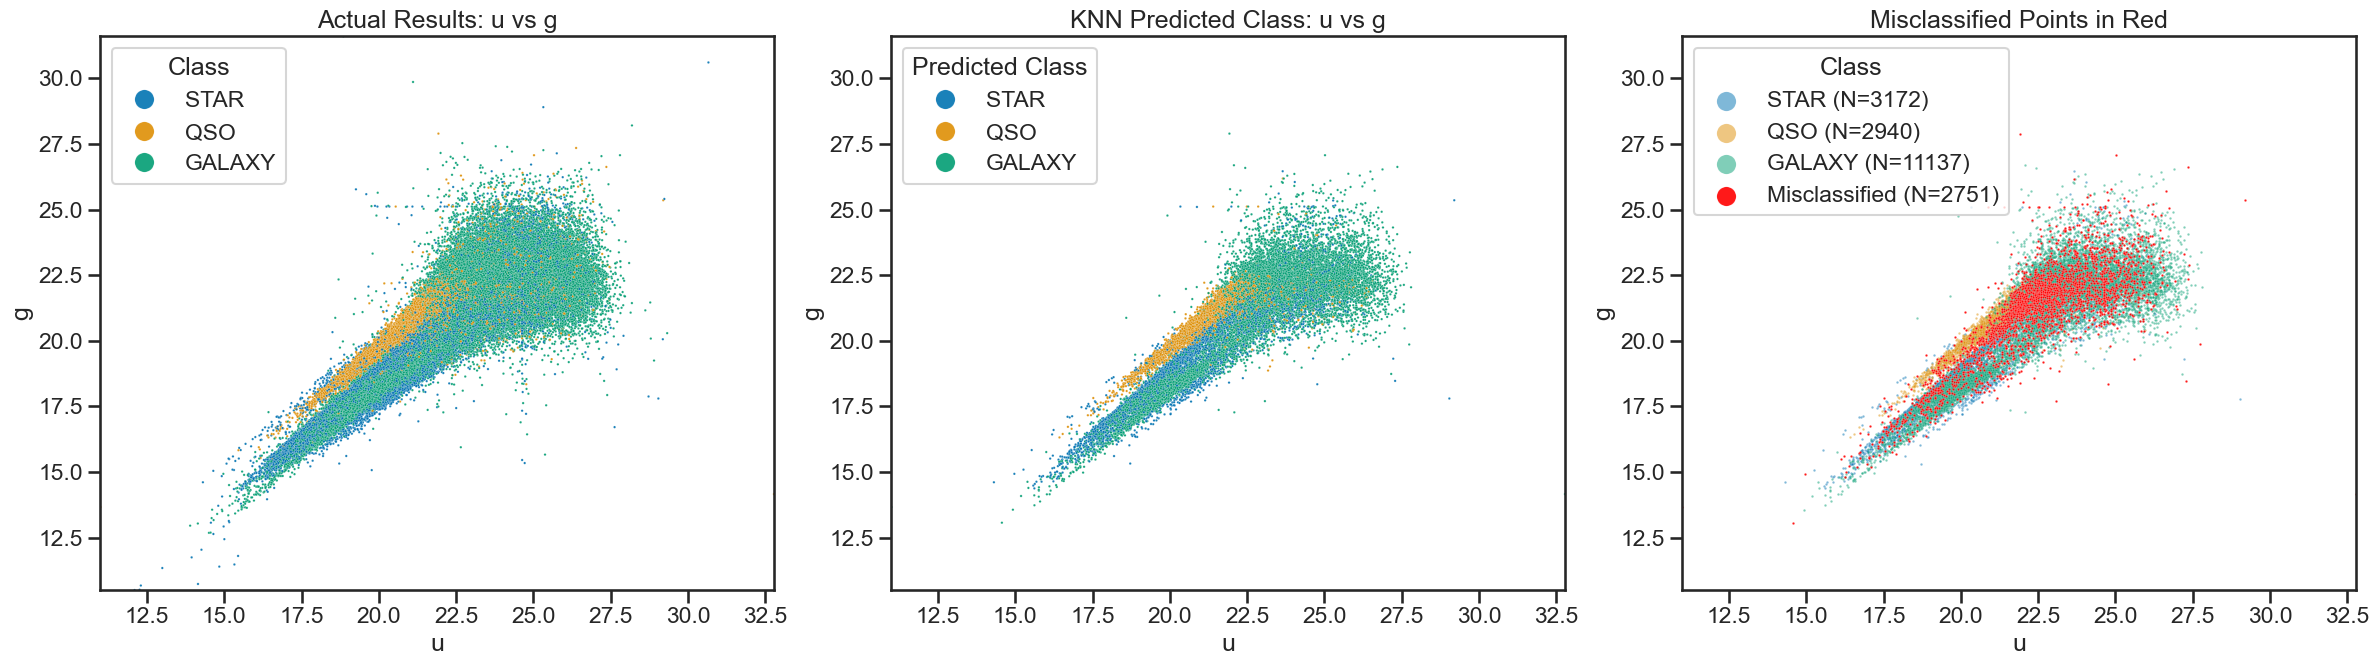

In [60]:
# plot the data in u vs g with the actual results, classification results, and misclassified points as three plots

correctly_classified_df_3class = X_test_3class.copy()
correctly_classified_df_3class['true_class'] = y_test_3class
correctly_classified_df_3class['predicted_class'] = y_pred_3class
misclassified_df_3class = correctly_classified_df_3class[correctly_classified_df_3class['true_class'] != correctly_classified_df_3class['predicted_class']]
u_min_3class = min(df_stellar['u'].min(), X_test_3class['u'].min())
u_max_3class = max(df_stellar['u'].max(), X_test_3class['u'].max())
g_min_3class = min(df_stellar['g'].min(), X_test_3class['g'].min()) 
g_max_3class = max(df_stellar['g'].max(), X_test_3class['g'].max())

fig, axs = plt.subplots(1, 3, figsize=(24, 7))
# To ensure STAR, QSO, and GALAXY have the same color in all plots, define a consistent palette mapping
class_order_3class = ['STAR', 'QSO', 'GALAXY']
palette_3class = dict(zip(class_order_3class, sns.color_palette('colorblind', n_colors=3)))

# 1. Plot the actual results (u vs g, colored by true class)
sns.scatterplot(
    x='u', y='g', hue='class', data=df_stellar,
    alpha=0.9, s=3, palette=palette_3class, ax=axs[0], hue_order=class_order_3class
)
axs[0].set_title('Actual Results: u vs g')
axs[0].set_xlabel('u')
axs[0].set_ylabel('g')
axs[0].legend(title='Class', loc='upper left', markerscale=8)
# 2. Plot the classification results (u vs g, colored by predicted class)   

sns.scatterplot(
    x=X_test_3class['u'], y=X_test_3class['g'], hue=y_pred_3class,
    alpha=0.9, s=3, palette=palette_3class, ax=axs[1], hue_order=class_order_3class
)
axs[1].set_title('KNN Predicted Class: u vs g')
axs[1].set_xlabel('u')
axs[1].set_ylabel('g')
axs[1].legend(title='Predicted Class', loc='upper left', markerscale=8)

# 3. Plot only the misclassified points in red, correctly classified in class colors

# Count the number of correctly classified points for each predicted class
correct_counts_3class = correctly_classified_df_3class[correctly_classified_df_3class['true_class'] == correctly_classified_df_3class['predicted_class']]['predicted_class'].value_counts()
# Plot correctly classified points, with legend showing N for each class
for cls in class_order_3class:
    cls_mask = (correctly_classified_df_3class['predicted_class'] == cls) & (correctly_classified_df_3class['true_class'] == cls)
    sns.scatterplot(
        x=correctly_classified_df_3class.loc[cls_mask, 'u'],
        y=correctly_classified_df_3class.loc[cls_mask, 'g'],
        color=palette_3class[cls],
        label=f"{cls} (N={correct_counts_3class.get(cls, 0)})",
        ax=axs[2], alpha=0.5, s=3
    )
# Plot misclassified points in red
sns.scatterplot(
    x=misclassified_df_3class['u'], y=misclassified_df_3class['g'],
    color='red', label=f"Misclassified (N={len(misclassified_df_3class)})", ax=axs[2], alpha=0.9, s=3
)
axs[2].set_title('Misclassified Points in Red')
axs[2].set_xlabel('u')
axs[2].set_ylabel('g')
axs[2].legend(title='Class', loc='upper left', markerscale=8)
# Set the same axes limits for all plots
for ax in axs:
    ax.set_xlim(u_min_3class, u_max_3class)
    ax.set_ylim(g_min_3class, g_max_3class)
plt.tight_layout()
# write the figure to a file
plt.savefig('./figures/classification_results_knn_3class_n5.png', dpi=300, bbox_inches='tight')
plt.show()
# Perform cross-validation on the KNN classifier with k=5 for the 3-class prob